Celem laboratorium było zapoznanie się tematem lokalizacji źródła dźwięku. 
Należało wygenerować sygnał sinusoidalny, a następnie wygenerować podobny sygnał do oryginalnego przesunięty o zadaną wartość czasu i wyliczenie kąta potrzebnego do zlokalizowania źródła dźwięku.
Na podstawie otrzymanych wyników należało wyciągnąć wnioski.

Importy oraz stałe:

In [1]:
import numpy as np
from typing import Tuple
from matplotlib import pyplot as plt
from scipy.io import wavfile

SOUNDS_DIR = './sounds'

Pomocnicza funkcja generująca sygnał sinus. Przesunięcie sygnału można podać jako argument funkcji, domyślnie przesunięcie jest wyzerowane.
Generowany sygnał pochodzi z przedziału 0÷2.5 ms.

In [2]:
def generate_sinus(sample_rate: int = 96000, frequency: float = 4000, shift: float = 0.0) -> Tuple:
    dt = 1 / sample_rate
    t = np.arange(0, 0.0025 - dt, dt)

    return t, np.sin(2 * np.pi * frequency * (t + shift))

Funkcja wykonująca eksperyment.

Generuje przesunięty sygnał o zadaną wartość przesunięcia, a następnie zapisuje go do pliku.
Następnie generowana jest wizualizacja zestawiająca oryginalny sygnał wraz z sygnałem przesuniętym o zadaną wartość.

Do wyznaczenia kąta potrzebnego do zlokalizowania źródła dźwięku wyliczana jest korelacja wzajemna pomiędzy sygnałem oryginalnym a sygnałem przesuniętym.
Następnie wyznaczane jest ratio pomiędzy ilością próbek oryginalnych, a ilością próbek korelacji. Jest to niezbędne, aby wybrać w przybliżeniu wartość przesuniętej sekundy, dla której wartość korelacji wzajemnej była największa.
Na końcu wyliczana jest wartość kąta do zlokalizowania źródła dźwięku.

Do obliczenia korelacji wzajemnej wykorzystano funkcję z pakietu `numpy`.
Funkcja `np.correlate` oblicza korelację, zdefiniowana ogólnie według wzoru:

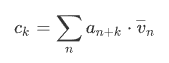

Przyjmuje sekwencje `a` oraz `v` uzupełnianymi zerami tam, gdzie to jest konieczne i oznacza sprzężenie zespolone.
Użycie `mode='full'` oznacza zwrócenie splotu w każdym punkcie nakładania się, z wyjściowym kształtem (N+M-1,). W punktach końcowych splotu sygnały nie pokrywają się całkowicie i mogą być widoczne efekty brzegowe.

In [3]:
def experiment(shift_val: float, original_signal: np.array) -> None:
    time_moved, signal_moved = generate_sinus(sample_rate=sample_rate, shift=shift_val)  # generating moved signal
    wavfile.write(f"{SOUNDS_DIR}/signal_shifted_{shift_val}_mono_32.wav", sample_rate, time_moved.astype(np.int32))

    # visualisation
    plt.figure()
    plt.plot(time, original_signal, label='original signal')
    plt.plot(time, signal_moved, label=f'shifted signal about {shift_val}s')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

    correlation = np.correlate(a=original_signal, v=signal_moved, mode='full')
    correlation_ratio = correlation.shape[0] / time_moved.shape[0]  # ratio to find where should be real value

    delta_t = time_moved[int(np.argmax(correlation) / correlation_ratio)] * (1 / sample_rate)
    a = np.arcsin(delta_t * sound_speed / distance)

    print(f'Angle for moved signal: {a}\n')

Określenie wartości zmiennych wykorzystanych w trakcie eksperymentu. 
Przesunięcia określono z przedziału od 0.02 ms do 0.2 ms.

In [4]:
sample_rate = 96000
moves = [0.00002, 0.00004, 0.00008, 0.00012, 0.00016, 0.0002]  # moves signal about part of second amount

Wygenerowanie sygnału podstawowego oraz jego zapis do pliku.

In [5]:
time, signal = generate_sinus(sample_rate=sample_rate)
wavfile.write(f"{SOUNDS_DIR}/signal_original_mono_32.wav", sample_rate, signal.astype(np.int32))

Określenie zmiennych odpowiadających za prędkość dźwięku rozchodzenia się w powietrzu w m/s przy temperaturze 20°C oraz średniej odległości pomiędzy uszami w metrach.

In [6]:
sound_speed = 344  # sound speed in air with temperature 20°C, m/s
distance = 0.21  # radius of head, distance between ears in meters

Główna pętla wykonująca ekpermenty i przedstawiająca wyniki.

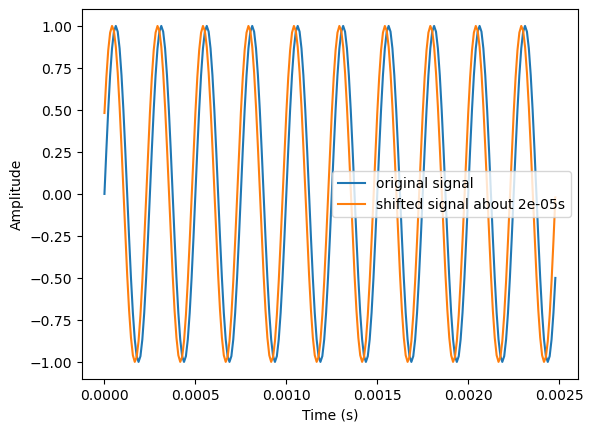

Angle for moved signal: 2.132936508098235e-05



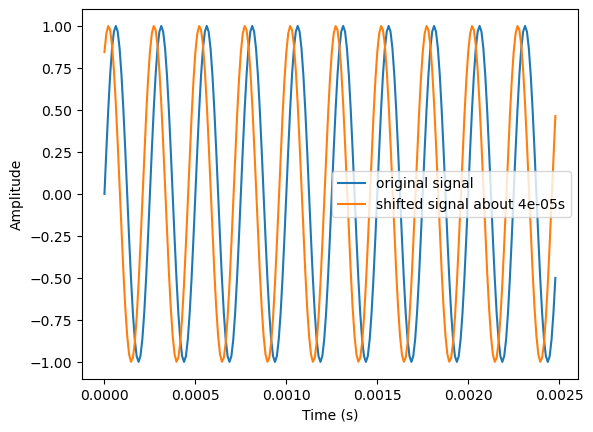

Angle for moved signal: 2.1507109790017825e-05



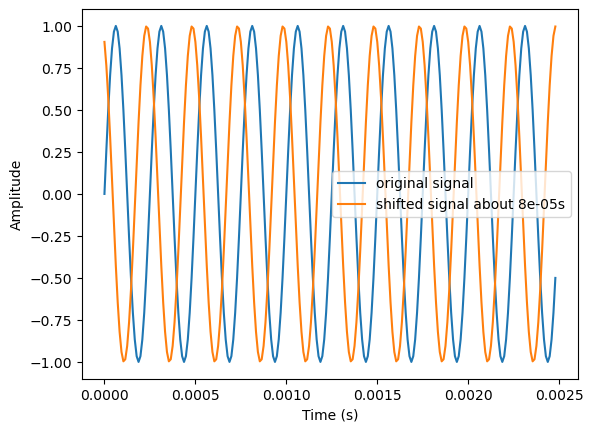

Angle for moved signal: 2.186259920809083e-05



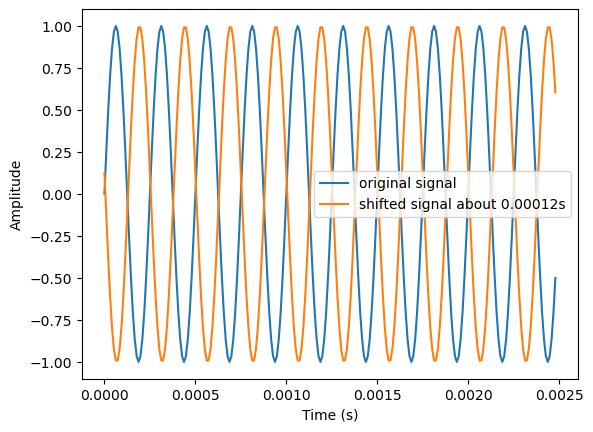

Angle for moved signal: 2.2218088626166593e-05



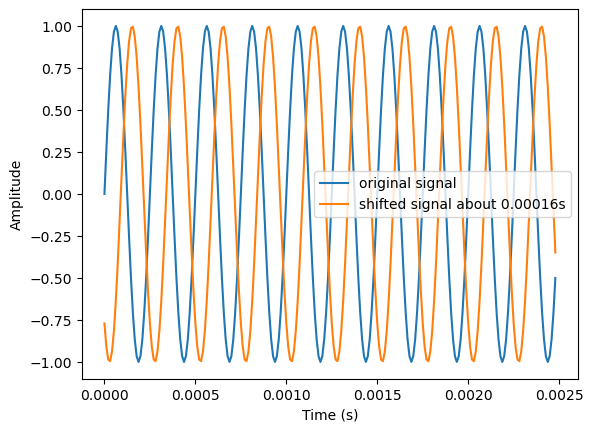

Angle for moved signal: 2.026289682678343e-05



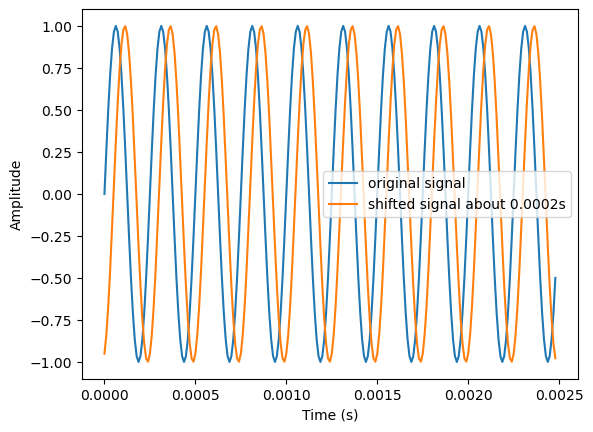

Angle for moved signal: 2.061838624484712e-05



In [7]:
for move in moves:
    experiment(move, signal)

Wnioski:
* Do lokalizowania źródła dźwięku wybrano częstotliowość 4kHz. Jest to wartość mieszcząca się w przedziale najbardziej słyszalnym dla człowieka, czyli 3-5kHz.
* Wartości kątów do zlokalizowania źródła dźwięku są bardzo niskie, co oznacza, że źródło dźwięku znajduje się na wprost twarzy i różnica czasu pomiędzy jednym uchem a drugim jest bardzo niska.
* Zmiany kątów pomiędzy poszczególnymi przesunięciami o ułamki milisekund są bardzo niewielkie. Oznacza to, że przesunięcia sygnału o tak niewielką ilość sekund nie powoduje znaczącej zmiany w lokalizacji źródła dźwięku. 
* W każdym przypadku kąt jest dodatni, co oznacza, że dźwięk jest bliżej ucha prawego i szybciej odbiera je prawe ucho w stosunku do lewego.